In [1]:
##python.exe -m pip install --upgrade pip

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('stardata.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# Analysing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
#plt.scatter(df['Radius(R/Ro)'],df['Star type'])

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df.duplicated().sum()

0

In [8]:
## Check the input counts for star color
print("Color                 Count\n-----------------------------\n",
df['Star color'].value_counts()) # teslls all the unique values / inputs present

Color                 Count
-----------------------------
 Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64


In [9]:
df.replace({"Star color" : {"Blue-white" : "Blue-White",
                                  "Blue White" : "Blue-White",
                                  "Blue white" : "Blue-White",
                                  "Blue white " : "Blue-White",
                                  "Blue-White" : "Blue-White",
                                  "yellow-white" : "Yellow-White",
                                  "Yellowish White" : "Yellow-White",
                                  "yellowish" : "Yellow-White",
                                  "White-Yellow" : "Yellow-White",
                                  "Yellowish" : "Yellow-White",
                                  "white" : "White",
                                  "Whitish" : "White",
                                  "Blue " : "Blue",
                                  "Pale yellow orange" : "Red",
                                  "Orange" : "Red",
                                  "Orange-Red" : "Red"}},
                                  inplace = True)
print("Color           Count\n-----------------------------\n", df['Star color'].value_counts())

Color           Count
-----------------------------
 Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: Star color, dtype: int64


In [10]:
print("Class Count\n-------------------\n", df['Spectral Class'].value_counts())



Class Count
-------------------
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64


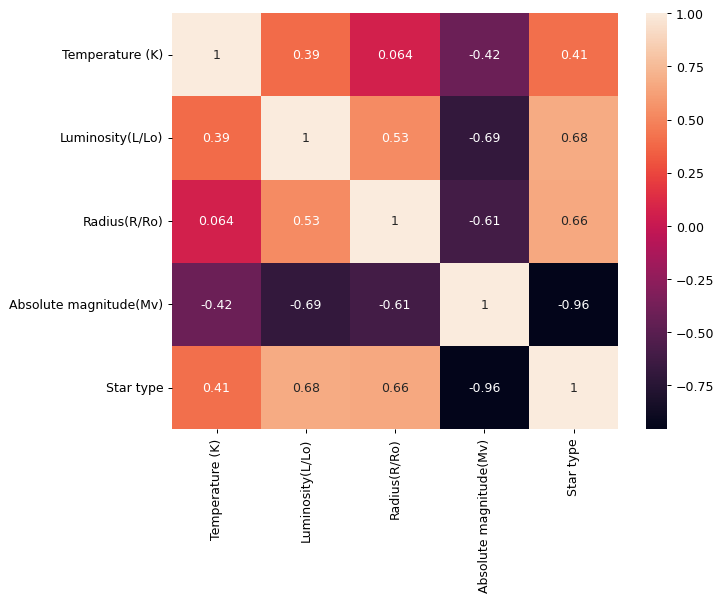

In [11]:
# Coorelation in our data

fig, ax = plt.subplots(figsize = (8, 6), dpi = 90)
sns.heatmap(df.corr(), ax = ax, annot = True)
plt.show()

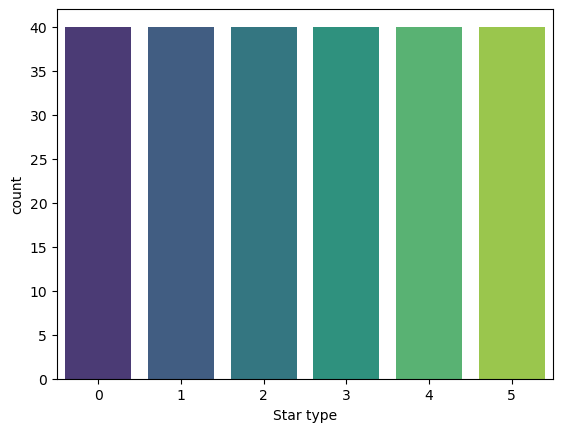

In [12]:
# Checking if the dataset is balanced

sns.countplot(x = df['Star type'], palette = "viridis")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]]
y = df['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
X_train.values[0], X_test.values[0]

(array([ 1.8734e+04,  2.2478e+05,  4.6000e+01, -7.4500e+00]),
 array([1.650e+04, 1.300e-02, 1.400e-02, 1.189e+01]))

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[0], X_test[0]

(array([ 0.37848191,  0.96906632, -0.37501586, -1.06020396]),
 array([ 0.1834387 , -0.80980142, -0.46148759,  0.87090411]))

In [15]:
len(X_train)

24

In [16]:
len(X_test)

216

In [17]:
from sklearn.linear_model import LogisticRegression

## Build the Regressor
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
lr.score(X_train,y_train)

0.9166666666666666

# Confusion matrix to plot the inaccuracy

In [19]:
y_predicted = lr.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0],
       [ 0,  8,  0, 27,  0,  0],
       [ 0,  0,  0,  4, 32,  0],
       [ 0,  0,  0,  0,  0, 36]], dtype=int64)

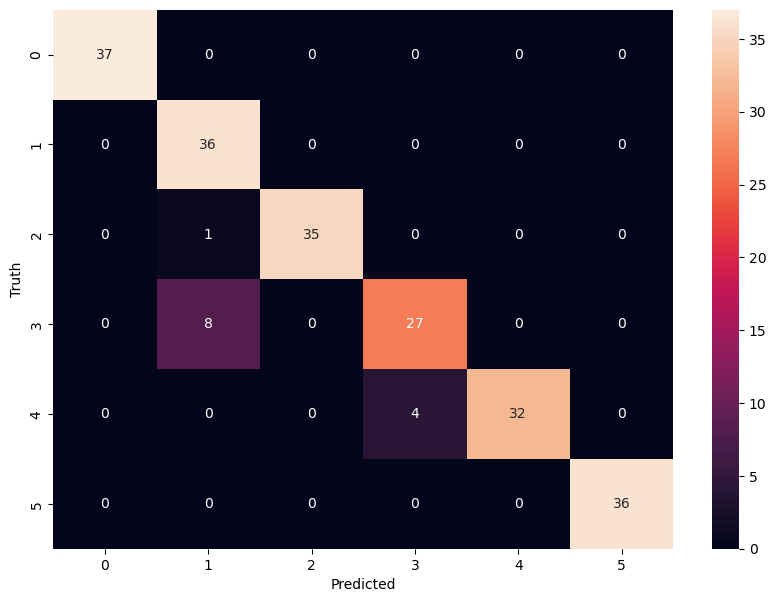

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [21]:
conversion_dict = {0  :  'Brown Dwarf',
                   1  :  'Red Dwarf',
                   2  :  'White Dwarf',
                   3  :  'Main Sequence',
                   4  :  'Supergiants',
                   5  :  'Hypergiants'}

In [22]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from colorama import Fore

test_sample_idx = int(input(f'Enter a test sample index to check (choose between 0 to {len(y_test)-1}): ')) # Get test index
print('*'*64)                                                                                               # Decorate the output
pred_label = lr.predict(X_test[test_sample_idx].reshape(1,-1))[0]                                       # Get the predicted label
actual_label = y_test.values[test_sample_idx]                                                               # Get the Actual label

# Printing the model output with actual output
print('\033[1mActual Category :', conversion_dict[actual_label] + '\033[0m')
if actual_label == pred_label:
    print(Fore.GREEN + f'\033[1mPredicted Category : {conversion_dict[pred_label]}\033[0m')
else:
    print(Fore.RED + f'Predicted Category : {conversion_dict[pred_label]}')

Enter a test sample index to check (choose between 0 to 215): 24
****************************************************************
Actual Category : Hypergiants
Predicted Category : Hypergiants


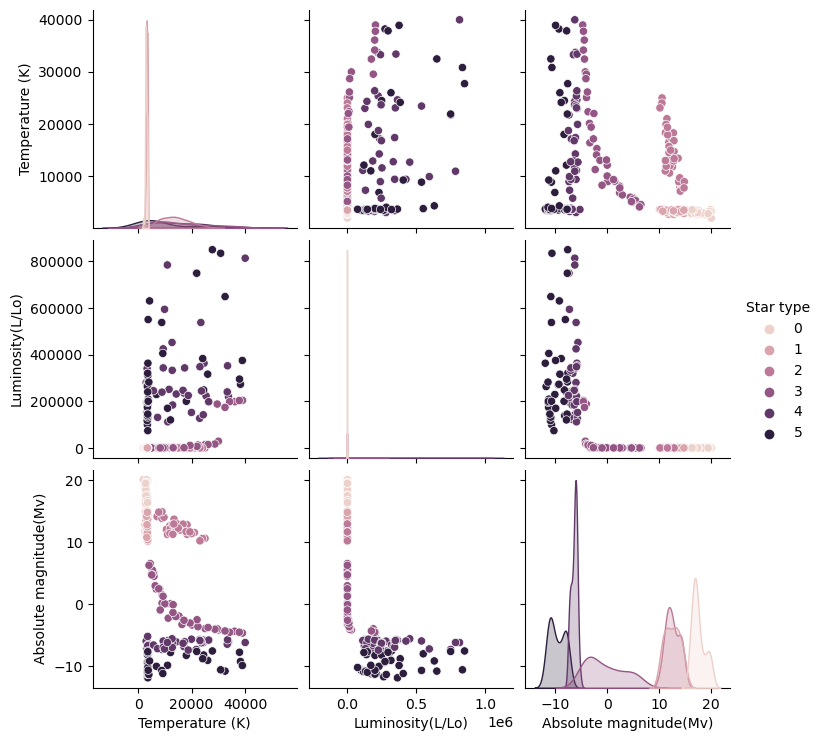

In [24]:
sns.pairplot(df[['Temperature (K)','Luminosity(L/Lo)','Absolute magnitude(Mv)','Star type']],hue = 'Star type')
plt.show()